In [1]:
from scripts.classes import *
from IPython.display import display
import os
os.chdir('..')
print(os.getcwd())


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0


In [4]:

b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]

worm_num = 0
print(os.getcwd())
data = Database(worm_num, verbose=1)
#exit()
data.exclude_neurons(b_neurons)
#vs = data.loadBundleVisualizer()
vs = data.createVisualizer()


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0
The dataset 'worm_0' has been loaded successfully.
It has: 109 neurons and 3137 observations
6 neurons have been removed.


[10, 11, 12, 13, 14, 15, 16, 17] [10, 11, 12, 13, 14, 15, 16, 17]
This is T


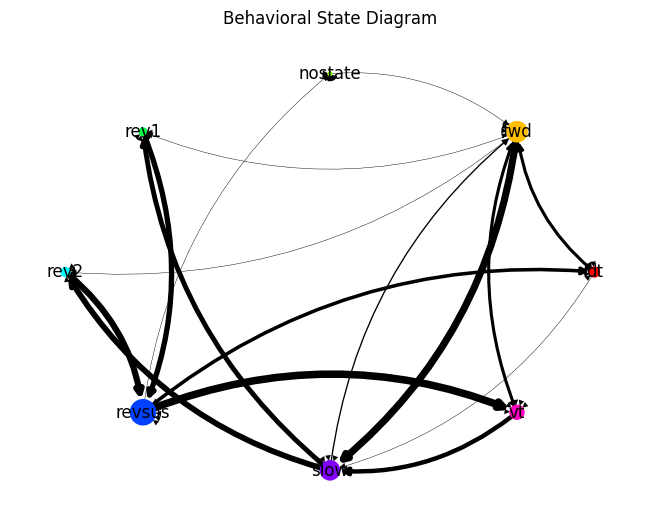

In [5]:
vs.behavioral_state_diagram()

In [4]:
#%matplotlib inline
%matplotlib notebook

movie = vs.make_movie(grid_off=True, interval=20, show_legend=True, quivers=False, save=False)
#vs.save_gif('second_movie')


Try using current latent dimension mapping (tau) for plotting.
No mapping present. CREATING PCA MODEL ...
(3, 3137)


<IPython.core.display.Javascript object>

In [14]:
movie.resume()
print('hie')

hie


In [19]:
data_worm1 = Database(4, verbose=0)
data_worm1.exclude_neurons(b_neurons)
vs1 = data_worm1.createVisualizer()

data_worm2 = Database(2, verbose=0)
data_worm2.exclude_neurons(b_neurons)
vs2 = data_worm2.createVisualizer()

8 neurons have been removed.
8 neurons have been removed.


In [20]:
vs1.attachBundleNet(epochs=500)
_, X1 = preprocess_data(vs1.X.T, vs1.fps)
X1, B1 = prep_data(X1, vs1.B)

print(X1.shape, B1.shape)

print(X1[:,0].shape)
print(vs1.model.tau.input_shape)

transformed_output1 = vs1.model.tau.predict(X1[:,0])
x, y, z = np.hsplit(transformed_output1, 3)

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=1, alpha=0.5)
plt.show()

(3006, 2, 15, 121) (3006,)


Losses 0.001668 0.000406 0.002073: 100%|██████████| 500/500 [00:22<00:00, 22.52it/s]


(3006, 2, 15, 121) (3006,)
(3006, 15, 121)
(None, 15, 121)
94/94 [==============================] - 0s 354us/step


<IPython.core.display.Javascript object>

In [8]:
_, X2 = preprocess_data(vs2.X.T, vs2.fps)
X2, B2 = make_windowed_data(X2, vs2.B)
X2 = X2[:,:,:103]
print(X2.shape)
print(B2.shape)
print(bundle_net.tau.input_shape)


transformed_output2 = bundle_net.tau.predict(X2)
x, y, z = np.hsplit(transformed_output2, 3)

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, alpha=0.5)

(3119, 15, 103)
(3119,)
(None, 15, 103)
98/98 [==============================] - 0s 348us/step


<IPython.core.display.Javascript object>

In [8]:
fps_1 = 2.9046296296296297
fps_2 = 2.901851851851852
_, X_test = preprocess_data(vs.X.T)

X_test, B_1 = make_windowed_data(X_test, vs.B)


#win = 16
#X_win = np.zeros((X_test.shape[0] - win + 1, win, X_test.shape[1]))
#for i, _ in enumerate(X_win):
#	X_win[i] = X_test[i:i + win]
#B_1 = vs.B[win - 1:]

#X_test = X_win[:, :-1, :]

[0.00000000e+00 3.44277973e-01 6.88555945e-01 ... 1.07896717e+03
 1.07931144e+03 1.07965572e+03]
(3137,)


In [9]:
print(X_test.shape)
print(B_1.shape)
#X_test = X_test[:100, :, :]
print(bundle_net.tau.input_shape)

(3122, 15, 103)
(3122,)
(None, 15, 103)


In [10]:
transformed_output = bundle_net.tau.predict(X_test)
print(transformed_output.shape)

colordict = dict(zip(np.unique(B_1), generate_equidistant_colors(len(np.unique(B_1)))))
colors = [colordict[val] for val in B_1]

print(B_1.shape)
print(len(colors))


98/98 [==============================] - 0s 371us/step
(3122, 3)
(3122,)
3122


In [11]:
x, y, z = np.hsplit(transformed_output, 3)

In [12]:
#plt.scatter(transformed_output)

#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=1, alpha=0.5, color=colors)

<IPython.core.display.Javascript object>